# Modelling gender pay gap data

Aim is to get insights from different models and compare. This would help direct future data collection, too.

Getting insights is probably more important than predictions for this dataset since it is unclear what may be the cause of gender pay gap.

### Some assumptions: 

- From data exploration and through gender pay gap reports we see the difference in number of women and men in upper quartile and lower quartile to be a potential factor. 
- We believe the company size could also play a role because ...
- Gender pay gap can be more obvious in some industries than others

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [3]:
data.shape

(10817, 25)

In [4]:
#Columns that have a single value for all rows do not contain any information for modeling.

print(data.nunique())

EmployerName                 10817
Address                       9313
CompanyNumber                 9478
SicCodes                      2004
DiffMeanHourlyPercent          851
DiffMedianHourlyPercent        891
DiffMeanBonusPercent          1712
DiffMedianBonusPercent        1761
MaleBonusPercent               978
FemaleBonusPercent             974
MaleLowerQuartile              977
FemaleLowerQuartile            977
MaleLowerMiddleQuartile        982
FemaleLowerMiddleQuartile      982
MaleUpperMiddleQuartile        976
FemaleUpperMiddleQuartile      976
MaleTopQuartile                946
FemaleTopQuartile              946
CompanyLinkToGPGInfo          6244
ResponsiblePerson             7509
EmployerSize                     7
CurrentName                  10816
SubmittedAfterTheDeadline        2
DueDate                          2
DateSubmitted                10695
dtype: int64


In [5]:
# drop columns with 2 unique values and the ones that make no difference like ResponsiblePerson
del_cols = ["ResponsiblePerson","SubmittedAfterTheDeadline","DueDate","DateSubmitted"]
data.drop(del_cols, axis=1, inplace=True)
data.shape

(10817, 21)

In [6]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


No duplicate rows!

if there were, drop with: data.drop_duplicates(inplace=True)

In [7]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


From count we see the DiffMeanBonusPercent and DiffMedianBonusPercent have missing values.

The max and min values are also crazy.

In [8]:
#borrowed from Lean's notebook

# Mean because the measurement is mean
mean_bonus_percent = data['DiffMeanBonusPercent'].mean()
data['DiffMeanBonusPercent'] = data['DiffMeanBonusPercent'].fillna(mean_bonus_percent)

# Median because the measurement is median
median_bonus_percent = data['DiffMedianBonusPercent'].median()
data['DiffMedianBonusPercent'] = data['DiffMedianBonusPercent'].fillna(median_bonus_percent)

# keeping crazy data because bonuses can be crazy 16-04
# clean up - dropping all with values bigger than 100
# data = data[(data.DiffMeanBonusPercent>-100) & 
#      (data.DiffMeanBonusPercent<100) &
#      (data.DiffMedianBonusPercent>-100) &
#      (data.DiffMedianBonusPercent<100)]

In [9]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,1.647587,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,200.536355,270.517216,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,7.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,21.800000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,51.600000,37.500000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


In [125]:

data['MalePercent'] = (data['MaleLowerQuartile'] +
                     data['MaleLowerMiddleQuartile'] + data['MaleUpperMiddleQuartile'] +
                     data['MaleTopQuartile']) *.25
data['FemalePercent'] = (data['FemaleLowerQuartile'] + data['FemaleLowerMiddleQuartile'] +
                       data['FemaleUpperMiddleQuartile'] + data['FemaleTopQuartile']
                       )*.25
data['WorkforceGenderSkew'] = data['MalePercent'] - data['FemalePercent']

data['PercMaleWorkforceInTopQuartile'] =  data['MaleTopQuartile'] / data['MalePercent'] * .25
data['PercMaleWorkforceInUpperMiddleQuartile'] =  data['MaleUpperMiddleQuartile'] / data['MalePercent'] * .25
data['PercMaleWorkforceInLowerMiddleQuartile'] =  data['MaleLowerMiddleQuartile'] / data['MalePercent'] * .25
data['PercMaleWorkforceInLowerQuartile'] =  data['MaleLowerQuartile'] / data['MalePercent'] * .25

data['PercFemaleWorkforceInTopQuartile'] =  data['FemaleTopQuartile'] /data['FemalePercent']/100 * .25
data['PercFemaleWorkforceInUpperMiddleQuartile'] =  data['FemaleUpperMiddleQuartile'] / data['FemalePercent'] * .25
data['PercFemaleWorkforceInLowerMiddleQuartile'] =  data['FemaleLowerMiddleQuartile'] / data['FemalePercent'] * .25
data['PercFemaleWorkforceInLowerQuartile'] =  data['FemaleLowerQuartile'] / data['FemalePercent'] * .25

data['RepresentationInTopQuartileSkew'] = data['PercMaleWorkforceInTopQuartile'] - data['PercFemaleWorkforceInTopQuartile']
data['RepresentationInUpperMiddleQuartileSkew'] = data['PercMaleWorkforceInUpperMiddleQuartile'] - data['PercFemaleWorkforceInUpperMiddleQuartile']
data['RepresentationInLowerMiddleQuartileSkew'] = data['PercMaleWorkforceInLowerMiddleQuartile'] - data['PercFemaleWorkforceInLowerMiddleQuartile']
data['RepresentationInLowerQuartileSkew'] = data['PercMaleWorkforceInLowerQuartile'] - data['PercFemaleWorkforceInLowerQuartile']

data['BonusGenderSkew'] = data['MaleBonusPercent'] - data['FemaleBonusPercent']
# del data['MaleBonusPercent']
# del data['FemaleBonusPercent']
# del data['PercFemaleWorkforceInTopQuartile']
# del data['PercFemaleWorkforceInUpperMiddleQuartile']
# del data['PercFemaleWorkforceInLowerMiddleQuartile']
# del data['PercFemaleWorkforceInLowerQuartile']
# del data['PercMaleWorkforceInTopQuartile']
# del data['PercMaleWorkforceInUpperMiddleQuartile']
# del data['PercMaleWorkforceInLowerMiddleQuartile']
# del data['PercMaleWorkforceInLowerQuartile']

In [126]:
new_data = data[['SicCodes','DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 'MaleBonusPercent', 'FemaleBonusPercent',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew',
                 'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile','PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile','PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile',
                ]]

new_data.dropna(axis=0, inplace = True) #droping missing values everywhere
print(new_data.shape)

(10313, 30)


/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [127]:
#picked up on the internet
def sic_desc(df,sic):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='SIC Code')

In [128]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [129]:
new_data = sic_desc(new_data,siccode)

In [130]:
# https://www.datacamp.com/community/tutorials/categorical-data
#used label encoding but would one hot encoding be better
new_data['EmployerSize'] = new_data['EmployerSize'].astype('category')
print(new_data['EmployerSize'].unique())
new_data['EmployerSize'] = new_data['EmployerSize'].cat.codes
print(new_data['EmployerSize'].unique())

[500 to 999, 250 to 499, 1000 to 4999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
Categories (7, object): [500 to 999, 250 to 499, 1000 to 4999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
[3 2 0 4 5 1 6]


In [131]:
new_data.describe()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleBonusPercent,FemaleBonusPercent,MaleLowerMiddleQuartile,...,RepresentationInTopQuartileSkew,PercMaleWorkforceInTopQuartile,PercMaleWorkforceInUpperMiddleQuartile,PercMaleWorkforceInLowerMiddleQuartile,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,SIC Code
count,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,...,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,13909.000000
mean,56614.537953,14.480252,12.871562,19.061834,3.047186,44.343302,55.656698,32.446827,30.984965,48.329378,...,0.300273,0.302316,0.255816,0.228781,0.213087,0.002043,0.229833,0.259843,0.306023,64079.433245
std,30100.172763,13.728399,15.772262,170.568240,240.931637,24.609982,24.609982,36.196435,35.682490,26.527230,...,0.070259,0.070024,0.046778,0.047317,0.059480,0.000695,0.060397,0.061464,0.101606,23390.617747
min,1.000000,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1110.000000
25%,41100.000000,5.400000,1.500000,6.300000,0.000000,24.000000,36.450000,0.000000,0.000000,26.500000,...,0.257908,0.259887,0.236188,0.205882,0.180272,0.001681,0.209828,0.240964,0.252959,46730.000000
50%,62090.000000,13.800000,10.600000,18.401390,15.550000,42.000000,58.000000,13.000000,11.000000,45.000000,...,0.287730,0.289403,0.258333,0.235669,0.216000,0.002109,0.240928,0.261745,0.280507,70100.000000
75%,85100.000000,22.800000,22.350000,49.500000,35.800000,63.550000,76.000000,70.000000,65.100000,71.000000,...,0.331178,0.333333,0.277788,0.256535,0.246531,0.002382,0.260167,0.284295,0.333623,85200.000000
max,99999.000000,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.998571,1.000000,1.000000,0.698925,0.680412,0.010000,1.000000,1.000000,1.000000,99999.000000


In [132]:
new_data.dropna(axis=0) #dropping ones without siccode

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleBonusPercent,FemaleBonusPercent,MaleLowerMiddleQuartile,...,PercMaleWorkforceInTopQuartile,PercMaleWorkforceInUpperMiddleQuartile,PercMaleWorkforceInLowerMiddleQuartile,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,SIC Code,Description
0,85310,19.6,32.5,18.40139,15.55,32.4,67.6,0.0,0.0,38.2,...,0.315758,0.265995,0.226303,0.191943,0.002020,0.238322,0.267301,0.292388,85310.0,General secondary education
1,47730,7.7,-4.2,23.70000,-75.20,31.6,68.4,22.2,82.0,12.7,...,0.266404,0.152231,0.166667,0.414698,0.002461,0.273008,0.269611,0.211242,47730.0,Dispensing chemist in specialised stores
2,61900,7.7,12.7,11.30000,10.90,41.0,59.0,67.0,52.0,45.0,...,0.291667,0.260417,0.234375,0.213542,0.002115,0.240385,0.264423,0.283654,61900.0,Other telecommunications activities
3,78300,30.0,29.0,-10.00000,69.00,0.0,100.0,46.0,74.0,2.0,...,0.568182,0.386364,0.045455,0.000000,0.002107,0.233146,0.275281,0.280899,78300.0,Human resources provision and management of hu...
4,85200,13.4,12.7,0.00000,0.00,38.1,61.9,0.0,0.0,43.6,...,0.320272,0.252874,0.227795,0.199060,0.001855,0.247363,0.270374,0.296740,85200.0,Primary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15738,78300,26.6,29.6,56.90000,53.20,36.9,63.1,95.0,94.0,38.8,...,0.352736,0.270647,0.193035,0.183582,0.001462,0.229146,0.307538,0.317085,78300.0,Human resources provision and management of hu...
15739,82990,26.6,29.6,56.90000,53.20,36.9,63.1,95.0,94.0,38.8,...,0.352736,0.270647,0.193035,0.183582,0.001462,0.229146,0.307538,0.317085,82990.0,Other business support service activities n.e.c.
15740,82990,22.3,23.8,51.60000,50.60,37.9,62.1,95.0,96.0,61.8,...,0.291407,0.294728,0.256538,0.157327,0.001873,0.182275,0.240101,0.390321,82990.0,Other business support service activities n.e.c.
15741,70100,25.0,21.0,48.00000,56.00,41.0,59.0,58.0,84.0,62.0,...,0.313725,0.282353,0.243137,0.160784,0.001379,0.193103,0.262069,0.406897,70100.0,Activities of head offices


get percentage of women at each quartile as a factor of total women employees

In [133]:
new_data['FemalePerc']= 0.25 * (new_data.FemaleLowerQuartile + new_data.FemaleLowerMiddleQuartile +
                          new_data.FemaleUpperMiddleQuartile + new_data.FemaleTopQuartile)

In [134]:
new_data['MalePerc'] = 100 - new_data['FemalePerc']

In [135]:
# new_data['MalePercTest']= 0.25 * (new_data.MaleLowerQuartile + new_data.MaleLowerMiddleQuartile +
#                           new_data.MaleUpperMiddleQuartile + new_data.MaleTopQuartile)

In [136]:
new_data.head()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleBonusPercent,FemaleBonusPercent,MaleLowerMiddleQuartile,...,PercMaleWorkforceInLowerMiddleQuartile,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,SIC Code,Description,FemalePerc,MalePerc
0,85310,19.6,32.5,18.40139,15.55,32.4,67.6,0.0,0.0,38.2,...,0.226303,0.191943,0.002020,0.238322,0.267301,0.292388,85310.0,General secondary education,57.80,42.20
1,47730,7.7,-4.2,23.70000,-75.20,31.6,68.4,22.2,82.0,12.7,...,0.166667,0.414698,0.002461,0.273008,0.269611,0.211242,47730.0,Dispensing chemist in specialised stores,80.95,19.05
2,61900,7.7,12.7,11.30000,10.90,41.0,59.0,67.0,52.0,45.0,...,0.234375,0.213542,0.002115,0.240385,0.264423,0.283654,61900.0,Other telecommunications activities,52.00,48.00
3,78300,30.0,29.0,-10.00000,69.00,0.0,100.0,46.0,74.0,2.0,...,0.045455,0.000000,0.002107,0.233146,0.275281,0.280899,78300.0,Human resources provision and management of hu...,89.00,11.00
4,85200,13.4,12.7,0.00000,0.00,38.1,61.9,0.0,0.0,43.6,...,0.227795,0.199060,0.001855,0.247363,0.270374,0.296740,85200.0,Primary education,52.15,47.85


In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt
# https://www.kaggle.com/learn/intro-to-machine-learning
from tpot import TPOTRegressor

In [138]:
def automl(train_X, val_X, train_y, val_y, name='default'):
    pipeline_optimizer = TPOTRegressor(generations=10, population_size=150, cv=3,
                                    random_state=0xDEADBEEF, verbosity=3, scoring='neg_mean_absolute_error', n_jobs=-1, early_stop=5, periodic_checkpoint_folder='tpot_checkpoint')
    pipeline_optimizer.fit(train_X, train_y)
    new_preds = pipeline_optimizer.predict(val_X)
    print("TPOT mae:",mean_absolute_error(val_y, new_preds))
    print("TPOT rmse:",sqrt(mean_squared_error(val_y, new_preds)))
    #print("Random forest AIC: ", aic(val_y, new_preds, len(val_X.columns) ))
    print("TPOT R^2 score:", pipeline_optimizer.score(val_X, val_y)) #coefficient of determination R^2 of the prediction    
    pipeline_optimizer.export('tpot_exported_pipeline_{}.py'.format(name))
    return pipeline_optimizer

In [139]:
def decision_tree(train_X, val_X, train_y, val_y):
    # Define model. Specify a number for random_state to ensure same results each run
    model = DecisionTreeRegressor(random_state=1, max_depth=10, min_samples_split=10)

    # Fit model
    model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = model.predict(val_X)
    print("Decision tree mean absolute error:",mean_absolute_error(val_y, val_predictions))
    print("Decision tree root mean squared error:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Decision tree AIC:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Decision tree R^2 score: ",model.score(val_X, val_y))
    return model

In [140]:
def random_forest(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    new_preds = forest_model.predict(val_X)
    print("Random forest mae:",mean_absolute_error(val_y, new_preds))
    print("Random forest rmse:",sqrt(mean_squared_error(val_y, new_preds)))
    #print("Random forest AIC: ", aic(val_y, new_preds, len(val_X.columns) ))
    print("Random forest R^2 score:", forest_model.score(val_X, val_y)) #coefficient of determination R^2 of the prediction
    #accuracy(val_y,new_preds)
    return forest_model

In [141]:
#https://en.wikipedia.org/wiki/Akaike_information_criterion
#https://www.reddit.com/r/statistics/comments/5h2rbw/does_python_have_a_package_for_aicbic/
def aic(y, pred, k):
    error = y - pred
    sse = sum(error ** 2)
    aic = 2 * k - 2 * np.log(sse)
    return aic

In [142]:
def feature_imp(model, train_X):
    feature_importances = pd.DataFrame(model.feature_importances_,
    index = train_X.columns,
    columns=['importance']).sort_values('importance', ascending=False)
    sns.barplot(data=feature_importances.reset_index(),x='importance',y='index',orient='h')

In [143]:
def adaboost(train_X, val_X, train_y, val_y):
    adaboost_model = AdaBoostRegressor(random_state=1)
    adaboost_model.fit(train_X, train_y)
    val_predictions = adaboost_model.predict(val_X)
    print("Adaboost mae:",mean_absolute_error(val_y, val_predictions))
    print("Adaboost rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
   # print("Adaboost aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Adaboost R^2 score", adaboost_model.score(val_X, val_y))
    return adaboost_model

In [144]:
def gradboost(train_X, val_X, train_y, val_y):
    grad_model = GradientBoostingRegressor(random_state=1)
    grad_model.fit(train_X, train_y)
    val_predictions = grad_model.predict(val_X)
    print("Gradient Boosting mae:",mean_absolute_error(val_y, val_predictions))
    print("Gradient Boosting rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Gradient Boosting aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Gradient Boosting R^2 score", grad_model.score(val_X, val_y))
    return grad_model

In [145]:
def accuracy(target, pred): #bad idea for this since target may be zero
    # Calculate mean absolute percentage error (MAPE)
    errors = abs(target - pred)
    mape = 100 * (errors / target)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [146]:
#predict mean hourly rate
y = new_data.DiffMeanHourlyPercent
# features = ['DiffMeanBonusPercent','DiffMedianBonusPercent','MaleBonusPercent',
#        'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
#        'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
#        'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
#        'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes']

features = ['SicCodes','MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew',
                            'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile','PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile','PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile',
           ]
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) #test_size=0.25
decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
forest_model = random_forest(train_X, val_X, train_y, val_y)
adaboost_model = adaboost(train_X, val_X, train_y, val_y)
gradboost_model = gradboost(train_X, val_X, train_y, val_y)
#adaboost_model.feature_importances_

Decision tree mean absolute error: 5.863315953813247
Decision tree root mean squared error: 8.96716434510044
Decision tree R^2 score:  0.5949130107021345
Random forest mae: 4.120263465447154
Random forest rmse: 7.220987850378578
Random forest R^2 score: 0.7373174252442307
Adaboost mae: 8.374286965733235
Adaboost rmse: 11.080152152239751
Adaboost R^2 score 0.38151455423964065
Gradient Boosting mae: 5.656817117133813
Gradient Boosting rmse: 8.554794704461186
Gradient Boosting R^2 score 0.6313135133880607


In [83]:
mean_tpot_model = automl(train_X, val_X, train_y, val_y, name='mean')

30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to tpot_checkpoint/pipeline_gen_1_idx_0_2020.04.20_13-34-48.py
Saving periodic pipeline from pareto front to tpot_checkpoint/pipeline_gen_1_idx_1_2020.04.20_13-34-48.py
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['SicCodes', 'MaleBonusPercent', 'Fe

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['SicCodes', 'MaleBonusPercent', 'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile', 'EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew', 'RepresentationInLowerMiddleQuartileSkew', 'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew', 'PercMaleWorkforceInTopQuartile', 'PercMaleWorkforceInUpperMiddleQuartile', 'PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile', 'PercFemaleWorkforceInTopQuartile', 'PercFemaleWorkforceInUpperMiddleQuartile', 'PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2

_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['SicCodes', 'MaleBonusPercent', 'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile', 'EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew', 'RepresentationInLowerMiddleQuartileSkew', 'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew', 'PercMaleWorkforceInTopQuartile', 'PercMaleWorkforceInUpperMi

In [147]:
def correlatePredictions(model, val_X, val_y, name):
    preds = model.predict(val_X)
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.scatterplot(preds, val_y)
    # ax.plot(val_X.index, preds,label='Predicted value')
    #ax.legend()
    ax.set(xlabel='Predictions', ylabel='Actual pay gap',
           title=name)
    plt.show()

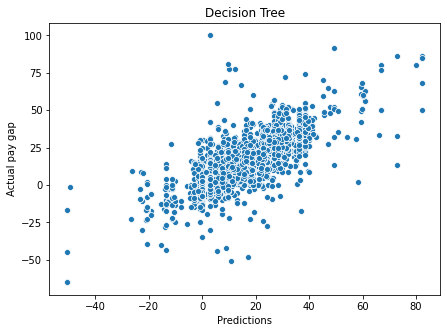

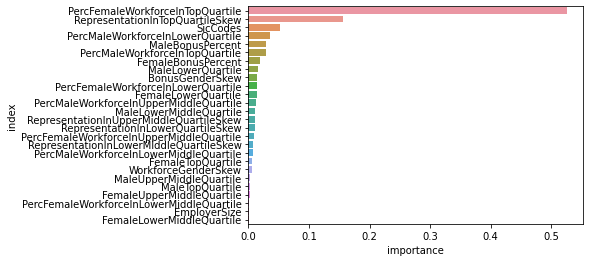

In [148]:
correlatePredictions(decision_tree_model,val_X,val_y,"Decision Tree")
feature_imp(decision_tree_model,train_X)

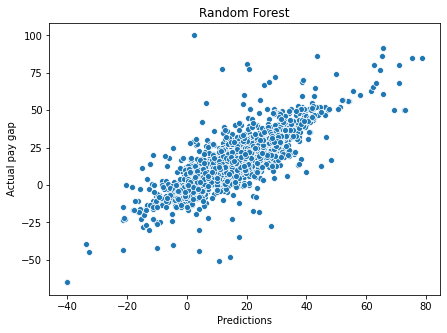

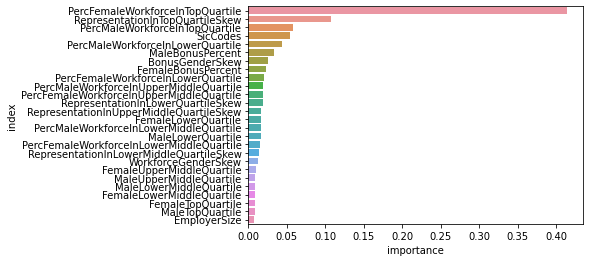

In [149]:
correlatePredictions(forest_model,val_X,val_y,"Random Forest")
feature_imp(forest_model,train_X)

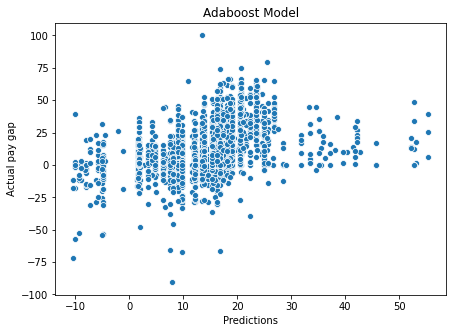

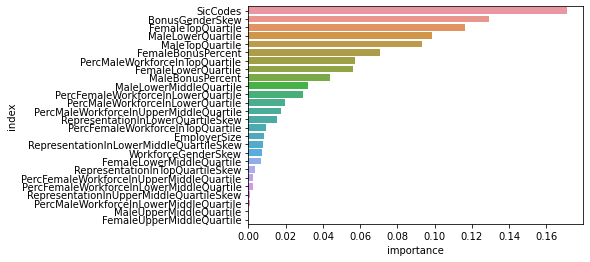

In [253]:
correlatePredictions(adaboost_model,val_X,val_y,"Adaboost Model")
feature_imp(adaboost_model,train_X)

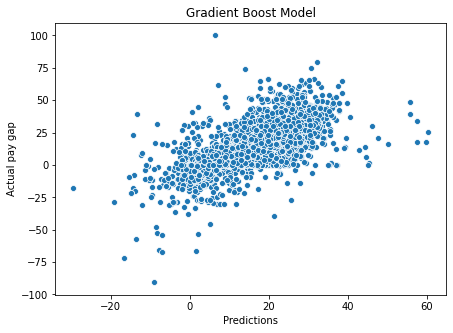

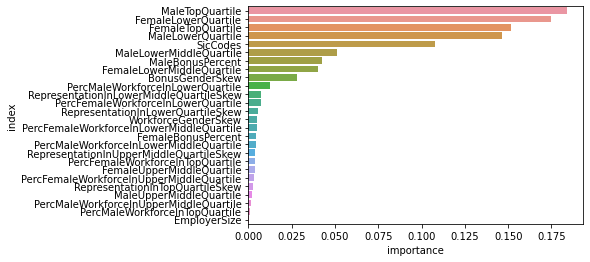

In [254]:
correlatePredictions(gradboost_model,val_X,val_y,"Gradient Boost Model")
feature_imp(gradboost_model,train_X)

In [150]:
#predict median hourly rate
#https://stats.stackexchange.com/questions/131267/how-to-interpret-error-measures
y = new_data.DiffMedianHourlyPercent
# features = ['MaleBonusPercent',
#        'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
#        'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
#        'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
#        'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes']
features = ['SicCodes','MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew',
                            'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile','PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile','PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile']

X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
median_decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
median_forest_model = random_forest(train_X, val_X, train_y, val_y)
median_adaboost_model = adaboost(train_X, val_X, train_y, val_y)
median_gradboost_model = gradboost(train_X, val_X, train_y, val_y)

Decision tree mean absolute error: 6.613299066737721
Decision tree root mean squared error: 10.680925360626532
Decision tree R^2 score:  0.5433235674262946
Random forest mae: 4.4387233231707315
Random forest rmse: 7.619096473460643
Random forest R^2 score: 0.7676205150540029
Adaboost mae: 8.699525329164059
Adaboost rmse: 11.537772084797734
Adaboost R^2 score 0.46711345973636176
Gradient Boosting mae: 6.164439689064073
Gradient Boosting rmse: 9.155098335907102
Gradient Boosting R^2 score 0.6644811949552317


In [151]:
median_tpot_model = automl(train_X, val_X, train_y, val_y, name='median')

30 operators have been imported by TPOT.




TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [ ]:
# from sklearn import tree
# import graphviz

# tree_graph = tree.export_graphviz(median_decision_tree_model, out_file=None, feature_names=features)
# graphviz.Source(tree_graph)


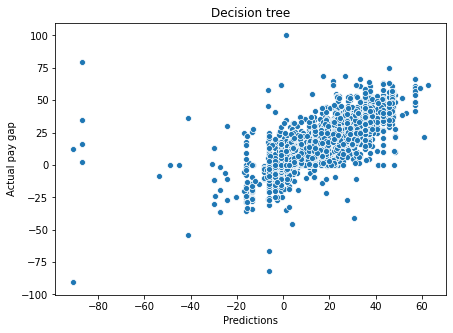

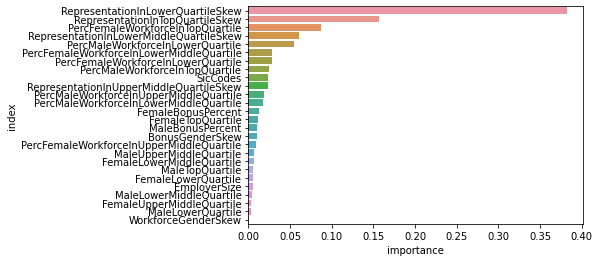

In [152]:
correlatePredictions(median_decision_tree_model,val_X,val_y,"Decision tree")
feature_imp(median_decision_tree_model,train_X)

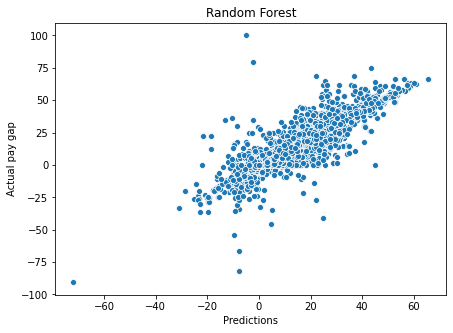

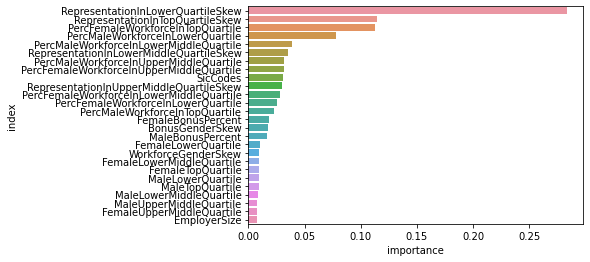

In [153]:
correlatePredictions(median_forest_model,val_X,val_y,"Random Forest")
feature_imp(median_forest_model,train_X)

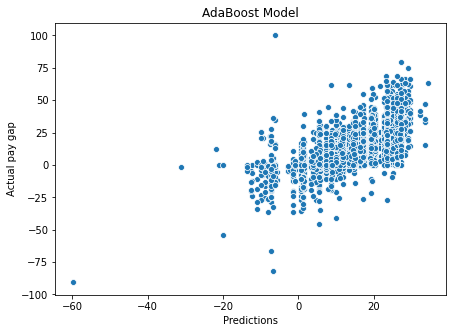

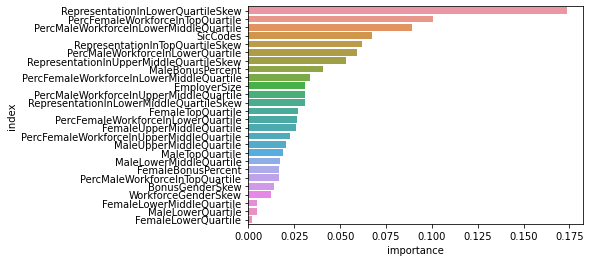

In [154]:
correlatePredictions(median_adaboost_model,val_X,val_y,"AdaBoost Model")
feature_imp(median_adaboost_model,train_X)

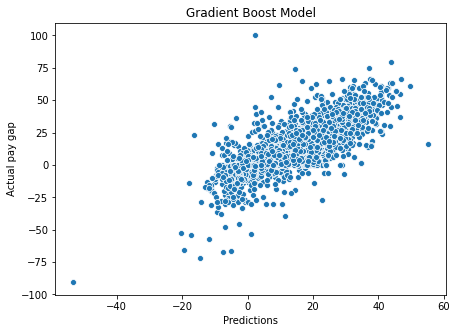

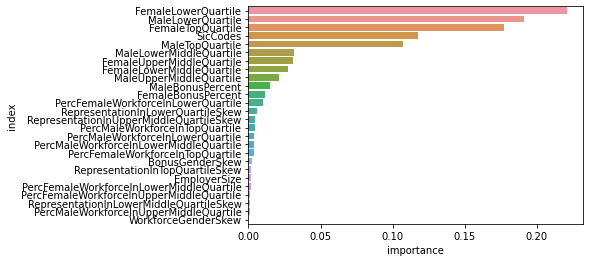

In [258]:
correlatePredictions(median_gradboost_model,val_X,val_y,"Gradient Boost Model")

feature_imp(median_gradboost_model,train_X)

In [259]:
trial_data = data.copy()

In [260]:
new_data.groupby('EmployerSize').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

EmployerSize
2    7017
3    3814
0    3514
4     808
5     484
1      99
6      11
Name: DiffMeanHourlyPercent, dtype: int64

In [261]:
new_data.groupby('SicCodes').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

SicCodes
1        1834
85310     654
82990     578
85200     438
84110     383
         ... 
24410       1
24520       1
25290       1
74201       1
46360       1
Name: DiffMeanHourlyPercent, Length: 621, dtype: int64

Imbalance in class...This needs work

## Permutation importance

https://www.kaggle.com/dansbecker/permutation-importance

In [155]:
import eli5
from eli5.sklearn import PermutationImportance

/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [156]:
perm = PermutationImportance(median_forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3449 ± 0.0194,RepresentationInLowerQuartileSkew
0.1689 ± 0.0100,RepresentationInTopQuartileSkew
0.1226 ± 0.0081,PercFemaleWorkforceInTopQuartile
0.0794 ± 0.0046,PercMaleWorkforceInLowerQuartile
0.0468 ± 0.0022,PercMaleWorkforceInLowerMiddleQuartile
0.0404 ± 0.0022,PercFemaleWorkforceInLowerMiddleQuartile
0.0320 ± 0.0026,SicCodes
0.0298 ± 0.0040,PercFemaleWorkforceInUpperMiddleQuartile
0.0294 ± 0.0065,RepresentationInLowerMiddleQuartileSkew
0.0292 ± 0.0046,FemaleBonusPercent


In [157]:
perm = PermutationImportance(median_gradboost_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1019 ± 0.0051,PercFemaleWorkforceInTopQuartile
0.0998 ± 0.0064,RepresentationInLowerQuartileSkew
0.0928 ± 0.0080,SicCodes
0.0763 ± 0.0082,PercMaleWorkforceInLowerQuartile
0.0621 ± 0.0038,RepresentationInTopQuartileSkew
0.0250 ± 0.0024,RepresentationInLowerMiddleQuartileSkew
0.0228 ± 0.0062,WorkforceGenderSkew
0.0148 ± 0.0026,PercMaleWorkforceInLowerMiddleQuartile
0.0133 ± 0.0026,RepresentationInUpperMiddleQuartileSkew
0.0111 ± 0.0013,PercFemaleWorkforceInUpperMiddleQuartile


## Partial dependence plot

In [265]:
from pdpbox import pdp, get_dataset, info_plots

In [266]:
def pdpFunction(model,data,features,feature_to_plot):
    pdp_score = pdp.pdp_isolate(model=model, dataset=data, model_features=features,
                                feature=feature_to_plot)
    pdp.pdp_plot(pdp_score, feature_to_plot)
    plt.show()
    #pdp.plt.savefig('Visualizations/'+feature_to_plot+'.png')

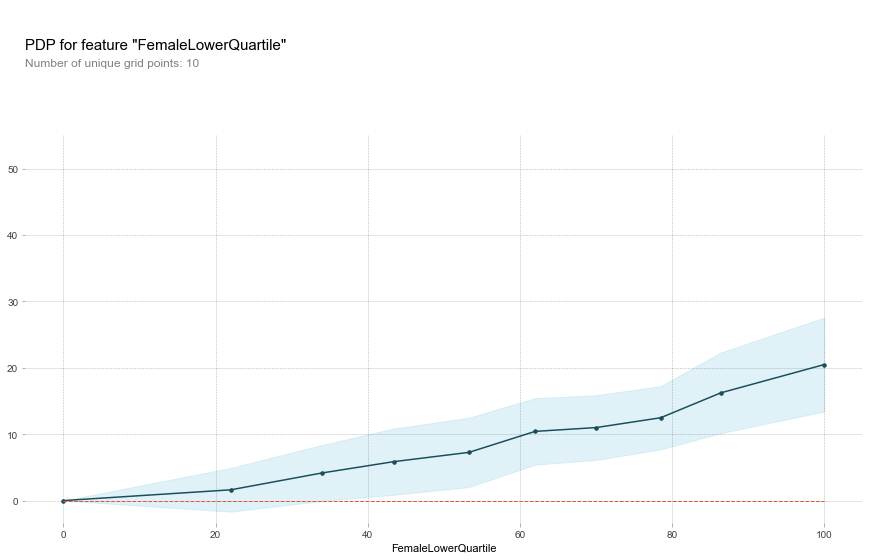

In [267]:
pdpFunction(median_forest_model,val_X,features,'FemaleLowerQuartile')

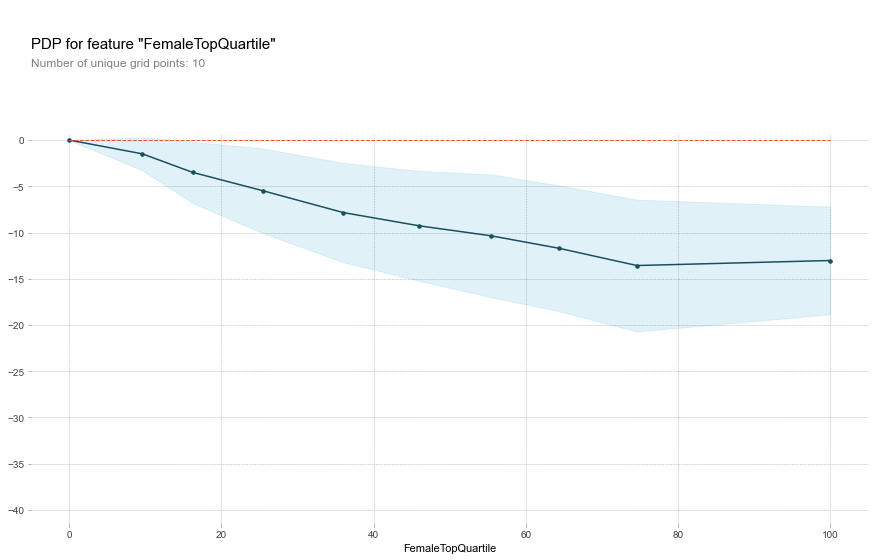

In [268]:
pdpFunction(median_forest_model,val_X,features,'FemaleTopQuartile')

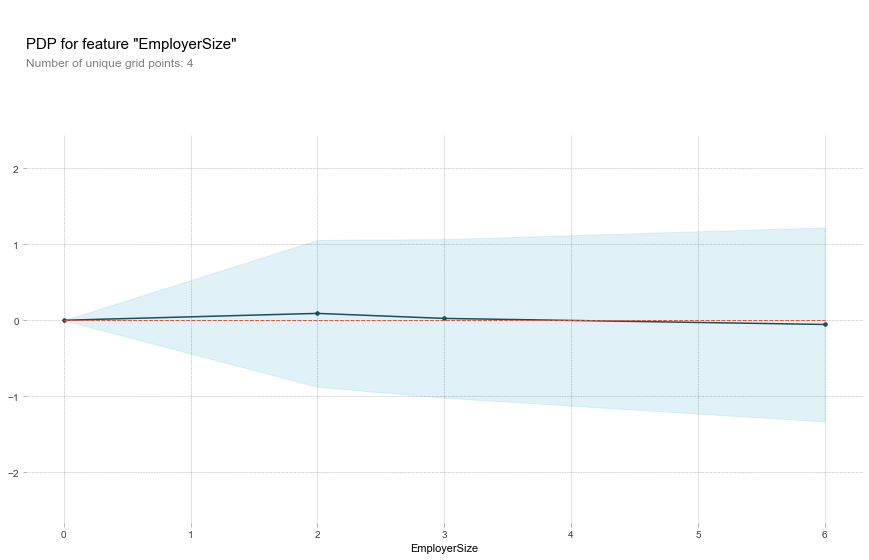

In [269]:
pdpFunction(median_forest_model,val_X,features,'EmployerSize')

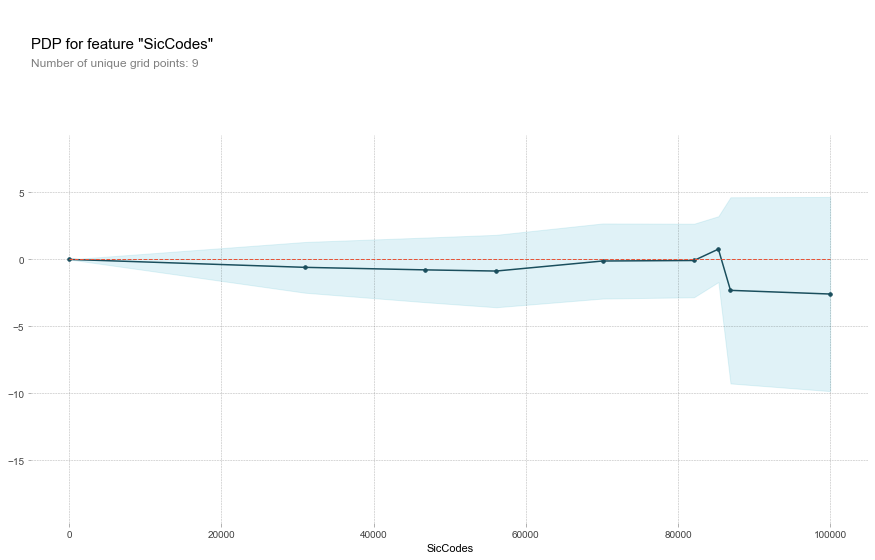

In [270]:
pdpFunction(median_forest_model,val_X,features,'SicCodes')

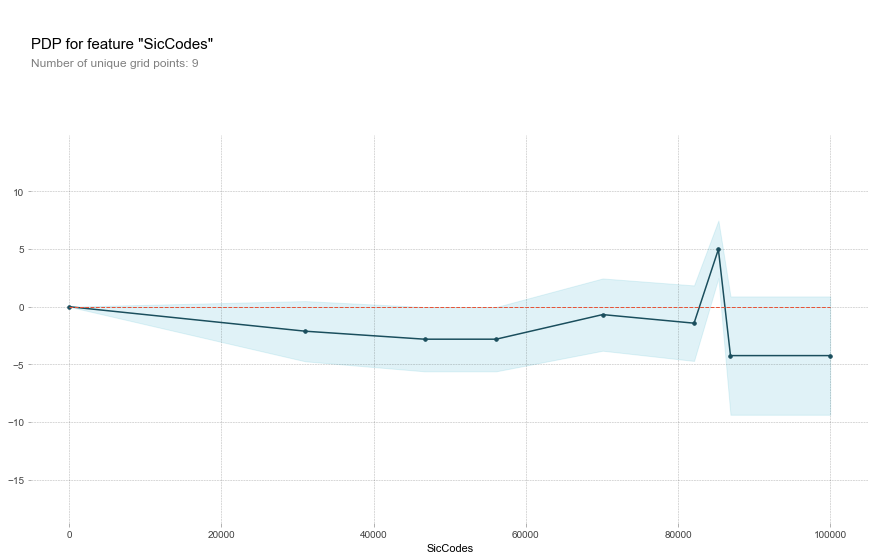

In [271]:
pdpFunction(median_gradboost_model,val_X,features,'SicCodes')

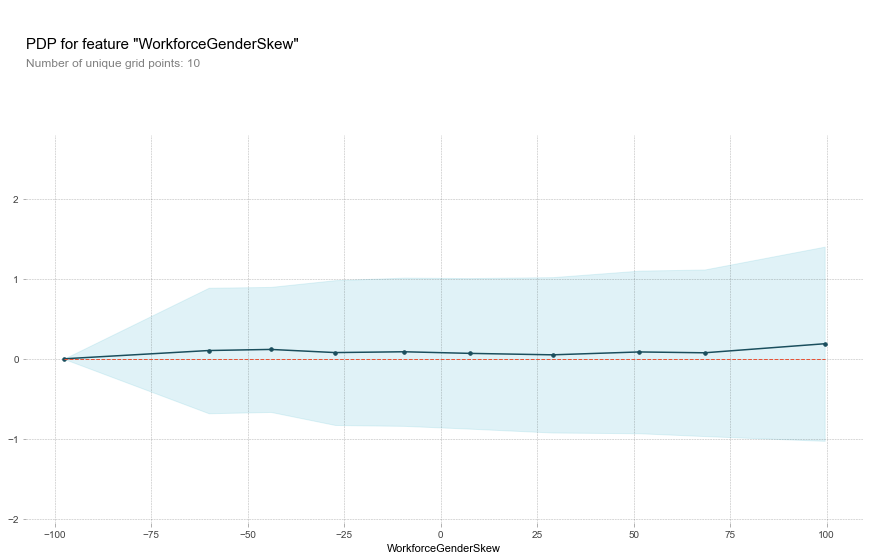

In [272]:
pdpFunction(median_forest_model,val_X,features,'Re')

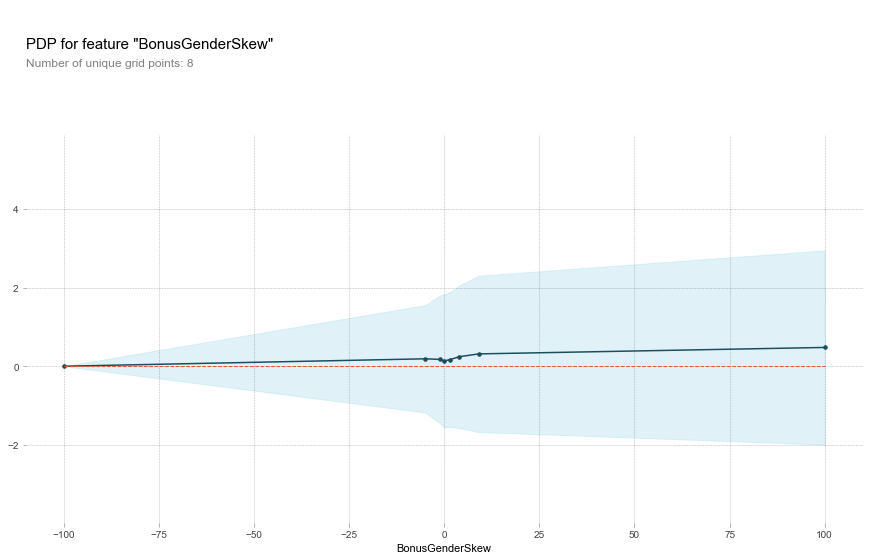

In [273]:
pdpFunction(median_forest_model,val_X,features,'BonusGenderSkew')

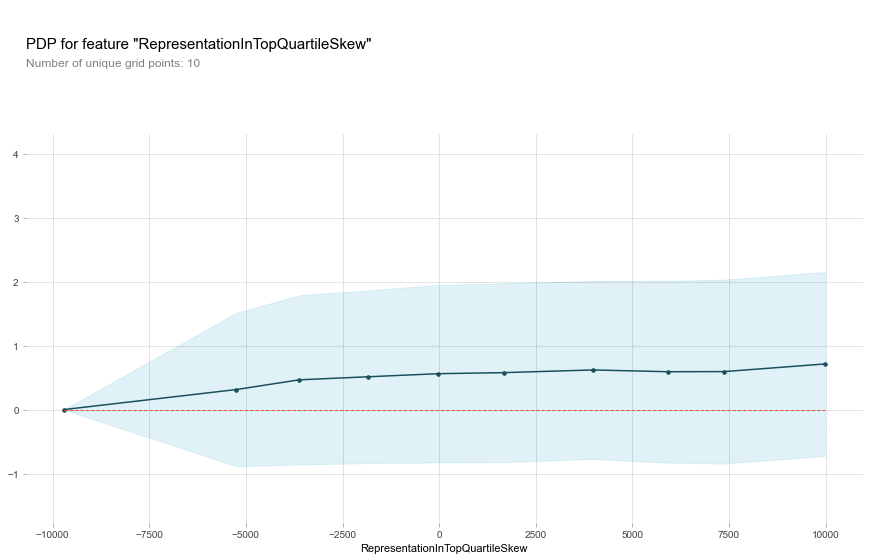

In [274]:
pdpFunction(median_forest_model,val_X,features,'RepresentationInTopQuartileSkew')

In [ ]:
# https://github.com/slundberg/shap
# this takes time
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_forest_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_gradboost_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)

In [ ]:
features

In [36]:
y = new_data.DiffMeanHourlyPercent
features = ['SicCodes',
              'FemaleLowerQuartile', 'FemaleUpperMiddleQuartile', 'FemaleLowerMiddleQuartile',
      'FemaleTopQuartile'
           ]
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) #test_size=0.25
decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
forest_model = random_forest(train_X, val_X, train_y, val_y)
adaboost_model = adaboost(train_X, val_X, train_y, val_y)
gradboost_model = gradboost(train_X, val_X, train_y, val_y)

Decision tree mean absolute error: 6.522746970361046
Decision tree root mean squared error: 9.973068274430803
Decision tree R^2 score:  0.4812319824540364
Random forest mae: 4.5658131021928705
Random forest rmse: 7.935743183759531
Random forest R^2 score: 0.6715336997196133
Adaboost mae: 8.635569893391255
Adaboost rmse: 11.555881651452903
Adaboost R^2 score 0.30349894258519006
Gradient Boosting mae: 5.988227624909375
Gradient Boosting rmse: 8.966261311086017
Gradient Boosting R^2 score 0.5806869366356334


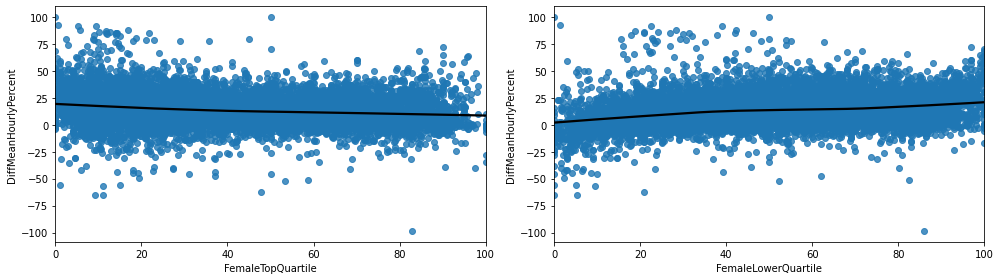

In [66]:
data.columns.values

fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.regplot(x='FemaleTopQuartile', y='DiffMeanHourlyPercent', data=data,lowess=True,line_kws=dict(color='k'), ax=ax[0])
sns.regplot(data['FemaleLowerQuartile'], data['DiffMeanHourlyPercent'], lowess=True,line_kws=dict(color='k'), ax=ax[1])
fig.tight_layout()

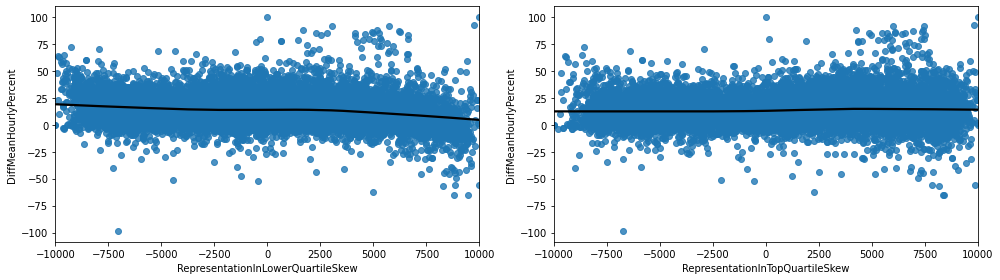

In [68]:
data.columns.values

fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.regplot(x='RepresentationInLowerQuartileSkew', y='DiffMeanHourlyPercent', data=data,lowess=True,line_kws=dict(color='k'), ax=ax[0])
sns.regplot(data['RepresentationInTopQuartileSkew'], data['DiffMeanHourlyPercent'], lowess=True,line_kws=dict(color='k'), ax=ax[1])
fig.tight_layout()